# Proyecto de los tres cuerpos

# Integrantes 

Sofía Castro Varona. Cuenta de github: SofCastro

Ximena Gonzalez Rosas. Cuenta de github: XRGonzalez

María Fernanda Monzón Salazar. Cuenta de github: fermonzón

## Introducción

Este notebook representa una simulación del problema de los tres cuerpos mediante una coreografía en forma de 8, propuesta por Chenciner y R. Montgomery. Para llevar a cabo la solución se analiza de manera numérica. No obstante, al no contar con una solución general, se le debe establecer condiciones ideales. 


Para empezar, se importan las siguientes paqueterías:

In [1]:
import numpy as np #paquetería para vectores y matrices
import matplotlib.pyplot as plt #paquetería para graficar
from scipy.integrate import odeint #paquetería para integrar

In [2]:
#Importamos la constante de gravitación universal
from scipy.constants import G 

Partiendo de la ley de gravitación universal, la cual establece la fuerza de atracción entre dos cuerpos, y de la segunda ley de Newton llegamos a las siguientes que describen la aceleración de cada cuerpo

## Ecuaciones de movimiento 

$$\ddot{\vec{r}}_{1} = -\dfrac{Gm_2(\vec{r}_{1} - \vec{r}_{2})}{||\vec{r}_{1} - \vec{r}_{2}||^3} - \dfrac{Gm_3(\vec{r}_{1} - \vec{r}_{3})}{||\vec{r}_{1} - \vec{r}_{3}||^{3}} $$

$$\ddot{\vec{r}}_{2} = - \dfrac{Gm_3(\vec{r}_{2} - \vec{r}_{3})}{||\vec{r}_{2} - \vec{r}_{3}||^3} - \dfrac{Gm_1(\vec{r}_{2} - \vec{r}_{1})}{||\vec{r}_{2} - \vec{r}_{1}||^{3}} $$

$$\ddot{\vec{r}}_{3} = - \dfrac{Gm_1(\vec{r}_{3} - \vec{r}_{1})}{||\vec{r}_{3} - \vec{r}_{1}||^3} - \dfrac{Gm_2(\vec{r}_{3} - \vec{r}_{2})}{||\vec{r}_{3} - \vec{r}_{2}||^{2}} $$

Se define un campo vectorial, que representa la distribución espacial de la magnitud y dirección de los vectores, el cual se usa para modelar la velocidad y aceleración de los cuerpos

## Campo Vectorial 

$$\dot{\vec{r}}_{1} = \vec{V}_{1}$$
$$\dot{\vec{r}}_{2} = \vec{V}_{2}$$
$$\dot{\vec{r}}_{3} = \vec{V}_{3}$$


$$\dot{\vec{V}}_{1} = - \left( \dfrac{Gm_2(\vec{r}_{1} - \vec{r}_{2})}{||\vec{r}_{1} - \vec{r}_{2}||^3} + \dfrac{Gm_3(\vec{r}_{1} - \vec{r}_{3})}{||\vec{r}_{1} - \vec{r}_{3}||^{3}} \right) $$

$$\dot{\vec{V}}_{2} = - \left( \dfrac{Gm_1(\vec{r}_{2} - \vec{r}_{1})}{||\vec{r}_{2} - \vec{r}_{1}||^3} + \dfrac{Gm_3(\vec{r}_{2} - \vec{r}_{3})}{||\vec{r}_{2} - \vec{r}_{3}||^{3}}\right) $$

$$\dot{\vec{V}}_{3} = - \left( \dfrac{Gm_1(\vec{r}_{3} - \vec{r}_{1})}{||\vec{r}_{3} - \vec{r}_{1}||^3} + \dfrac{Gm_2(\vec{r}_{3} - \vec{r}_{2})}{||\vec{r}_{3} - \vec{r}_{2}||^{3}}\right) $$

Se establecen las condiciones iniciales

| Posición (r)                    |   Velocidad ($\dot{r}$)
|---------------------------------|------------------
|  $r_1 = (0.97000436, -0.24308753)$               |    $\dot{r}_1 = (0.46620369, 0.43236573)$       
|  $r_2 = (0,0)$| $\dot{r}_2 = (-0.93240737, -0.86473146)$             
|   $r_3 = (-0.97000436, 0.24308753)$ |  $\dot{r}_3 = (0.46620369, 0.4323657)$

In [3]:
cond_int= np.array([-0.995492,0,0, 0.995492,0,0, 0,0,0, 0.0,0.0,0.067860,  0.0,0.0,0.067860 ,0.695804,1.067860,0.0])

In [4]:
cond_int #vemos el array

array([-0.995492,  0.      ,  0.      ,  0.995492,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.06786 ,
        0.      ,  0.      ,  0.06786 ,  0.695804,  1.06786 ,  0.      ])

In [5]:
cond_int[0:3] #coordenadas de r1

array([-0.995492,  0.      ,  0.      ])

In [6]:
cond_int[3:6] #coordnadas de r2

array([0.995492, 0.      , 0.      ])

In [7]:
cond_int[6:9] #coordenadas de r3

array([0., 0., 0.])

In [8]:
m_123 = np.array([1, 1, 1]) #se establece masas iguales

In [9]:
t = np.linspace(0, 100, 10001) #determinamos el tiempo

In [10]:
def distance(u, v): #se crea una función de distancia que recibe un array con las coordenadas de cada punto
    '''Calcula la distancia entre dos puntos'''
    return np.sqrt((u[0] - v[0])**2 + (u[1] - v[1])**2 + (u[2] - v[2])**2 ) #ecuación de distancia 

In [11]:
def three_body(y, t, masses): #se crea la función del campo vectorial
    '''Esta función recibe "y" como un array de las condiciones iniciales, un tiempo "t" y las masas de los cuerpos'''
    
    out = np.zeros(18) #se crea un array de 18 espacios con valores que inician en cero

    r_1, r_2, r_3 = y[0:3], y[3:6], y[6:9] #se le asigna a las posiciones sus condiciones iniciales
    V_1, V_2, V_3 = y[9:12], y[12:15], y[15:18] #se le asigna a las velocidades sus condiciones iniciales
    aux1 = (r_1 - r_2)/(distance(r_1, r_2))**3 #restamos los vectores r1 y r2 y lo dividimos entre su distancia al cubo
    aux2 = (r_1 - r_3)/(distance(r_1, r_3))**3 #restamos los vectores r1 y r3 y lo dividimos entre su distancia al cubo
    aux3 = (r_2 - r_3)/(distance(r_2, r_3))**3 #restamos los vectores r2 y r3 y lo dividimos entre su distancia al cubo
    Vdot_1 = -(masses[1]*aux1 + masses[2]*aux2) #sacamos la aceleración multiplocando aux1 por la masa 2 y sumándole la masa 3 multiplicada por aux 2
    Vdot_2 = -(-masses[0]*aux1 + masses[2]*aux3) #sacamos la aceleración multiplocando aux1 por la masa 1 y sumándole la masa 3 multiplicada por aux 3
    Vdot_3 = -(-masses[0]*aux2 - masses[1]*aux3) #sacamos la aceleración multiplocando aux2 por la masa 1 y restándole la masa 2 multiplicada por aux 3
    
    index = 0 #inicia la variable
    
    for j in (V_1, V_2, V_3, Vdot_1, Vdot_2, Vdot_3): #para j en las velocidades y aceleraciones de cada cuerpo
        for k in j: #para k en j 
            out[index] = k #se guarda las velocidades y aceleracioones en out
            
            index = index  + 1 
    
    return out #regresa el valor de out

In [12]:
three_body(cond_int, t, m_123) #corremoos la función con las condiciones iniciales, el tiempo y las masas

array([ 0.        ,  0.        ,  0.06786   ,  0.        ,  0.        ,
        0.06786   ,  0.695804  ,  1.06786   ,  0.        ,  1.26134667,
       -0.        , -0.        , -1.26134667, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ])

In [13]:
t = np.linspace(0, 2.0, 101) #tiempo de integración 

In [14]:
cond_int= np.array([0.97000436, -0.24308753,0, 0,0,0, -0.97000436, 0.24308753,0, 0.46620369,0.43236573,0.0,  -0.93240737,-0.86473146,0.0 , 0.46620369,0.43236573,0.0])

In [15]:
out = odeint(three_body, cond_int, t, args = (m_123,)) #usamos odeint para integrar nuestras condiciones iniciales

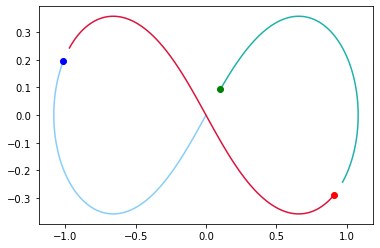

In [52]:
plt.plot(out[:,0],out[:,1], color ='lightseagreen' )
plt.plot(out[-1,0],out[-1,1], 'go')
plt.plot(out[:,3],out[:,4], color= 'lightskyblue')
plt.plot(out[-1,3],out[-1,4], 'bo')
plt.plot(out[:,6],out[:,7], color = 'crimson')
plt.plot(out[-1,6],out[-1,7], 'ro')